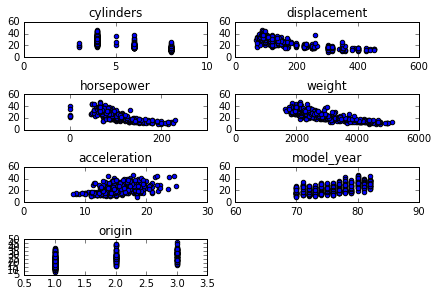

In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt

import pandas as pd

from sklearn import datasets, cross_validation, metrics
from sklearn import preprocessing

from tensorflow.contrib import skflow

# Read the original dataset
df = pd.read_csv("data/mpg.csv", header=0)
# Convert the displacement column as float
df['displacement']=df['displacement'].astype(float)
# We get data columns from the dataset
# First and last (mpg and car names) are ignored for X
X = df[df.columns[1:8]]
y = df['mpg']

plt.figure() # Create a new figure
f, ax1 = plt.subplots()
for i in range (1,8):
    number = 420 + i
    ax1.locator_params(nbins=3)
    ax1 = plt.subplot(number)
    plt.title(list(df)[i])
    ax1.scatter(df[df.columns[i]],y) #Plot a scatter draw of the  datapoints
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)


In [11]:
# Split the datasets

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y,
    test_size=0.25)

# Scale the data for convergency optimization
scaler = preprocessing.StandardScaler()

# Set the transform parameters
X_train = scaler.fit_transform(X_train)

# Build a 2 layer fully connected DNN with 10 and 5 units respectively
regressor = skflow.TensorFlowDNNRegressor(hidden_units=[10, 5],
    steps=500, learning_rate=0.051, batch_size=1)

# Fit the regressor
regressor.fit(X_train, y_train)

# Get some metrics based on the X and Y test data
score = metrics.mean_squared_error(regressor.predict(scaler.transform(X_test)), y_test)

print(" Total Mean Squared Error: " + str(score))

Step #99, avg. train loss: 182.33624
Step #199, avg. train loss: 25.09151
Step #300, epoch #1, avg. train loss: 11.92343
Step #400, epoch #1, avg. train loss: 11.20414
Step #500, epoch #1, avg. train loss: 5.14056
 Total Mean Squared Error: 15.0792258911
